In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, measure
import os
import cv2
from scipy.ndimage import gaussian_filter, uniform_filter
from tqdm import tqdm
import time

In [ ]:
# sample_images= []
# sample_masks = []
# test_images= []
# test_masks = []
# for i in range(1,16):
#     sample_img = nib.load('C:\\Users\\prita\\Desktop\\AIMIA\AIMIA_Assignment_1\\Q2\\Sample\\SampleImages\\dwi_slice_'+str(i)+'.nii.gz')
#     sample_mask = nib.load('C:\\Users\\prita\\Desktop\\AIMIA\AIMIA_Assignment_1\\Q2\\Sample\\SampleMasks\\dwi_mask_'+str(i)+'.nii.gz')
#     test_img = nib.load('C:\\Users\\prita\\Desktop\\AIMIA\AIMIA_Assignment_1\\Q2\\Test\\TestImages\\dwi_slice_'+str(i)+'.nii.gz')
#     test_mask = nib.load('C:\\Users\\prita\\Desktop\\AIMIA\AIMIA_Assignment_1\\Q2\\Test\\TestMasks\\dwi_mask_'+str(i)+'.nii.gz')
#     sample_images.append(sample_img.get_fdata()[0,:,:])
#     sample_masks.append(sample_mask.get_fdata()[0,:,:])
#     test_images.append(test_img.get_fdata()[0,:,:])
#     test_masks.append(test_mask.get_fdata()[0,:,:])


In [ ]:
sample_images= []
sample_masks = []
test_images= []
test_masks = []
data_dir = os.getcwd()  
sample_img_dir = os.path.join(data_dir, "Sample", "SampleImages")
sample_mask_dir = os.path.join(data_dir, "Sample", "SampleMasks")
test_img_dir = os.path.join(data_dir, "Test", "TestImages")
test_mask_dir = os.path.join(data_dir, "Test", "TestMasks")

for i in range(1, 16):
    sample_img_path = os.path.join(sample_img_dir, f"dwi_slice_{i}.nii.gz")
    sample_mask_path = os.path.join(sample_mask_dir, f"dwi_mask_{i}.nii.gz")
    test_img_path = os.path.join(test_img_dir, f"dwi_slice_{i}.nii.gz")
    test_mask_path = os.path.join(test_mask_dir, f"dwi_mask_{i}.nii.gz")

    sample_img = nib.load(sample_img_path)
    sample_mask = nib.load(sample_mask_path)
    test_img = nib.load(test_img_path)
    test_mask = nib.load(test_mask_path)

    sample_images.append(sample_img.get_fdata()[0, :, :])
    sample_masks.append(sample_mask.get_fdata()[0, :, :])
    test_images.append(test_img.get_fdata()[0, :, :])
    test_masks.append(test_mask.get_fdata()[0, :, :])

In [10]:
def normalize_intensity(img, method='minmax'):
    """Normalize intensities to zero-mean unit-variance or min-max"""
    x = img.copy().astype(np.float32)
    if method == 'zscore':
        m = np.mean(x)
        s = np.std(x)
        if s == 0:
            return x - m
        return (x - m) / s
    elif method == 'minmax':
        mn = x.min()
        mx = x.max()
        if mx == mn:
            return x - mn
        return (x - mn) / (mx - mn)
    else:
        raise ValueError("Unknown method")

In [11]:
def gaussian_smooth(img, sigma=0.5):
    """Apply Gaussian smoothing"""
    return gaussian_filter(img, sigma=sigma)

In [101]:
# plt.figure(figsize=(12, 12))
# sigmas = [0.1, 0.5, 1, 2]
# for i,sigma in enumerate(sigmas):
#     smoothed_images = gaussian_smooth(sample_images[5], sigma=sigma)
#     title = f"Gaussian Smoothing with sigma={sigma}"
#     plt.subplot(2, 2, i + 1)
#     plt.imshow(smoothed_images)
#     plt.title(title)
#     plt.axis('off')
#     plt.tight_layout()
# plt.show()

In [102]:
# def average_filter(img, size=3):
#     """Apply average filtering"""
#     return uniform_filter(img, size=size)

In [103]:
# plt.figure(figsize=(12, 8))
# plt.subplot(1, 3, 1)
# plt.imshow(sample_images[0], cmap='gray')
# plt.title("Original Image")
# plt.axis('off')
# plt.subplot(1, 3, 2)
# plt.imshow(gaussian_smooth(sample_images[0], sigma=0.1), cmap='gray')
# plt.title("Gaussian Smoothed Image")
# plt.axis('off')
# plt.subplot(1, 3, 3)
# plt.imshow(average_filter(sample_images[0], size=3), cmap='gray')
# plt.title("Average Filtered Image")
# plt.axis('off')
# plt.show()

In [104]:
def plot_histogram(image, title):
    image = normalize_intensity(image, method='minmax')
    plt.hist(image.ravel(), bins=50, color='blue', alpha=0.7, density=True)
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.grid()
    # plt.show()
    

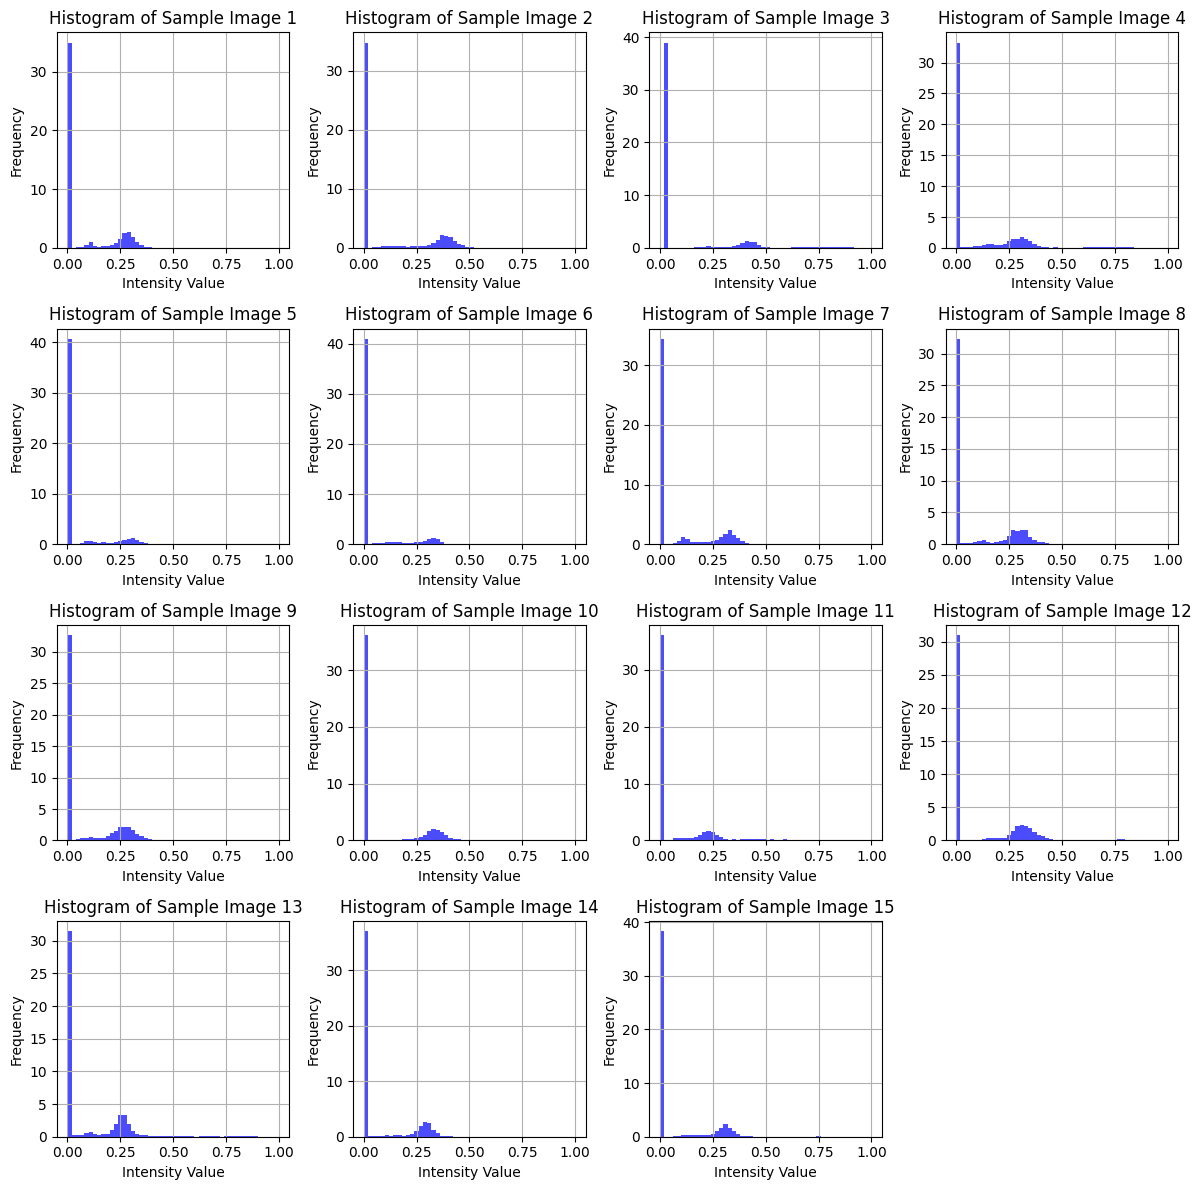

In [105]:
title = "Histogram of Sample Image"
plt.figure(figsize=(12, 12))
for idx in range(15):
    plt.subplot(4, 4, idx + 1)
    plot_histogram(sample_images[idx], f"{title} {idx+1}")
plt.tight_layout()
plt.show()

In [17]:
# plt.figure(figsize=(15,9))
# for i in range(len(sample_images)):
#     plt.subplot(3,5,i+1)
#     plt.suptitle('Sample Images', fontsize=14)
#     plt.imshow(sample_images[i])
#     plt.title('dwi_slice '+str(i+1))
#     plt.axis('off')
# plt.show()

In [ ]:
# plt.figure(figsize=(15,9))
# for i in range(len(sample_masks)):
#     plt.subplot(3,5,i+1)
#     plt.suptitle('Sample Masks', fontsize=14)
#     plt.imshow(sample_masks[i])
#     plt.title('dwi_mask '+str(i+1))
#     plt.axis('off')
# plt.show()

In [ ]:
# plt.figure(figsize=(15,9))
# for i in range(len(test_images)):
#     plt.subplot(3,5,i+1)
#     plt.suptitle('Test Images', fontsize=14)
#     plt.imshow(test_images[i])
#     plt.title('dwi_slice '+str(i+1))
#     plt.axis('off')
# plt.show()

In [ ]:
# plt.figure(figsize=(15,9))
# for i in range(len(test_masks)):
#     plt.subplot(3,5,i+1)
#     plt.suptitle('Test Masks', fontsize=14)
#     plt.imshow(test_masks[i])
#     plt.title('dwi_mask '+str(i+1))
#     plt.axis('off')
# plt.show()

In [108]:
sample_images[0].shape
print(f"Minimum intensity value: {np.min(sample_images[10])}, maximum intensity value: {np.max(sample_images[1])}")

Minimum intensity value: -8.053557820630886e-13, maximum intensity value: 665.9959771092981


## Gaussian Mixture Model

$$
f_{\mathbf{x}}(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^d |\boldsymbol{\Sigma}|}} \exp\left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu})\right)
$$
$$
\text{if } \boldsymbol{\Sigma} = \sigma^2 \mathbf{I} \text{ then the distribution is spherical}
$$
$$
\text{if }  \boldsymbol{\Sigma} \text{ is diagonal but not a constant product of I then the the variables are uncorrelated, and the ellipsoid's axes are aligned with the coordinate axes.}
$$

In [109]:
def gaussian_pdf(x, mean, cov, reg_covar=1e-6):
    """
    Multivariate Gaussian probability density function.
    x: (d) sample
    mean: (d)
    cov: (d,d) covariance
    """
    d = mean.shape[0]
    cov = cov + reg_covar * np.eye(d)  
    det_cov = np.linalg.det(cov)
    if det_cov <= 0:
        det_cov = reg_covar
    inv_cov = np.linalg.inv(cov)  
    diff = x - mean
    exponent = -0.5 * diff.T @ inv_cov @ diff
    coeff = 1 / np.sqrt((2 * np.pi) ** d * det_cov)
    return coeff * np.exp(exponent)

In [115]:
def k_means(X, K, max_iter, seed = 21):
    np.random.seed(seed)
    n_sample, n_feature = X.shape
    idx = np.random.choice(n_sample, K, replace=False)
    means = X[idx]
    for it in range(max_iter):
        labels = np.zeros(n_sample, dtype=int)
        for i in range(n_sample):
            dists = [np.linalg.norm(X[i] - means[k]) for k in range(K)]
            labels[i] = np.argmin(dists)
        new_means = np.zeros((K, n_feature))
        for k in range(K):
            points = X[labels == k]
            if len(points) > 0: 
                new_means[k] = points.mean(axis=0)
            else:
                new_means[k] = means[k]
        
        # Convergence check
        if np.allclose(means, new_means):
            # print(f"Converged at {it+1}")
            break
        means = new_means
    #Calculate the variance of each cluster
    variances = np.zeros(K)
    for k in range(K):
        points = X[labels == k]
        if len(points) > 0:
            variances[k] = np.var(points, axis=0).mean()  # Average variance across all features
        else:
            variances[k] = 0.0  # No points assigned to this cluster
    return means, labels, variances


In [139]:
X_list = []
for img in sample_images:
    X_list.append((img).reshape(-1, 1))
X = np.vstack(X_list)   # shape (sum of all pixels, 1)
X_norm = normalize_intensity(X, method='minmax') 

In [ ]:
# sample = normalize_intensity(sample_images[2].reshape(-1, 1), method='minmax')
# print(sample.shape)

(12544, 1)


In [178]:
K = 4
means, labels, variances = k_means(X_norm,K, max_iter=50, seed=21)

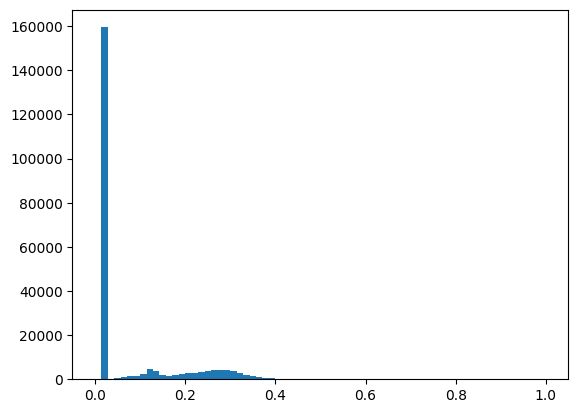

In [179]:
plt.hist(X_norm,bins=70, range=(0,1))
plt.show()

In [180]:
print(np.argmin(means))
print(means)
print(labels.shape)  
print(variances)

2
[[0.29134297]
 [0.61299038]
 [0.02492595]
 [0.15151498]]
(224000,)
[2.05787830e-03 1.16524594e-02 4.51148408e-05 1.46310532e-03]


In [182]:
def GaussianMixtureModel(X, K, max_iter=100, tol=1e-4, reg_covar=1e-6, verbose=False):
    """
    Fit a Gaussian Mixture Model (GMM) using the EM algorithm.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)(N,d)
        Data points.
    K : int
        Number of Gaussian components.
    max_iter : int, optional
        Maximum number of iterations for EM.
    tol : float, optional
        Convergence threshold on log-likelihood.
    reg_covar : float, optional
        Regularization term added to covariances for stability.
    verbose : bool, optional
        Print log-likelihood each iteration.
    
    Returns
    -------
    means : (K, d)
    covariances : (K, d, d)
    weights : (K,)
    responsibilities : (n_samples, K)
    log_likelihoods : list
    """
    n_samples, n_features = X.shape
    np.random.seed(21)
                        # means, _, variances = k_means(X, K, max_iter=max_iter, seed=21)
    # Initialize parameters
    # means = X[np.random.choice(n_samples, K, replace=False)] 
    """When replace is False, it means that the same element
    cannot be selected more than once. Shape (K,d) assuming there are d features and K clusters"""
    # cov = np.cov(X, rowvar=False) #When rowvar is False, each column represents a variable, while each row represents a single observation of all those variables.
    # if cov.ndim == 0:  # handle 1D data
    #     cov = np.array([[cov]])
    # covariances = np.array([cov] * K) #Initialize K covariance matrices to the same value
    covariances = []
    for k in range(K):
        if n_features == 1:  # 1D data
            covariances.append(np.array([[variances[k] + reg_covar]]))
        else:  # multi-D
            covariances.append(np.diag(variances[k] + reg_covar))  # diagonal covariance
    covariances = np.array(covariances)
    weights = np.ones(K) / K #Equal initial weights. This means that initially, each Gaussian component is assumed to contribute equally to the overall mixture.
    log_likelihoods = [] #To store the log-likelihood at each iteration

    for it in range(max_iter):
        # E-step: responsibilities
        responsibilities = np.zeros((n_samples, K)) #One-hot encoded responsibilities. Each row corresponds to a probability distribution over the K components for a given data point. Shape (N,K)
        for n in range(n_samples): #Iterate over each data point
            for k in range(K): #Iterate over each Gaussian component
                responsibilities[n, k] = weights[k] * gaussian_pdf(X[n], means[k], covariances[k], reg_covar) #Calculate the responsibility of component k for data point n
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)  # When axis=1, it means we are summing across the columns for each row. keepdims=True ensures that the result 
        #maintains the same number of dimensions as the input array, which is important for broadcasting during division.

        # M-step: update parameters
        Nk = responsibilities.sum(axis=0)  # effective number of points per cluster. Summing each column to get the total responsibility assigned to each cluster across all data points. Shape (K,)[N1,N2,...,Nk]
        for k in range(K):
            # Update means
            means[k] = (responsibilities[:, k][:, np.newaxis] * X).sum(axis=0) / Nk[k] #New mean is the weighted average of all data points, weighted by their responsibilities to cluster k. 
            #np.newaxis is used to convert the 1D array responsibilities[:, k] of shape (N,) into a 2D column vector of shape (N, 1). This allows for proper broadcasting when multiplying with X, which has shape (N, d).
            # Update covariances
            diff = X - means[k]
            covariances[k] = (responsibilities[:, k][:, np.newaxis] * diff).T @ diff / Nk[k] #Weighted covariance calculation
            #Here, responsibilities[:, k][:, np.newaxis] creates a column vector of shape (N, 1) from the responsibilities for cluster k. This allows for element-wise multiplication with diff, which has shape (N, d).
            # The result is a weighted version of diff, where each row (data point) is scaled by its responsibility to cluster k. 
            
            # Update weights
            weights[k] = Nk[k] / n_samples

        # Compute log-likelihood
        log_likelihood = 0
        for n in range(n_samples):
            prob = 0
            for k in range(K):
                prob += weights[k] * gaussian_pdf(X[n], means[k], covariances[k], reg_covar) #Total probability of data point n under the mixture model. p(x) = sum of p(x|zk =1)p(zk=1) over all k
            log_likelihood += np.log(prob + 1e-12) #Adding a small constant to avoid log(0)
        log_likelihoods.append(log_likelihood)

        if verbose:
            print(f"Iteration {it+1}, log-likelihood = {log_likelihood:.6f}")

        # Convergence check
        if it > 0 and abs(log_likelihood - log_likelihoods[-2]) < tol: #If the change in log-likelihood between iterations is less than tolerance, we consider the algorithm to have converged.
            if verbose:
                print("Converged.")
            break

    return means, covariances, weights, responsibilities, log_likelihoods


In [183]:
means, covariances, weights, responsibilities, log_likelihoods = GaussianMixtureModel(X_norm, K, max_iter=100, tol=1e-3, verbose=True)

Iteration 1, log-likelihood = 450559.853407
Iteration 2, log-likelihood = 651470.678240
Iteration 3, log-likelihood = 863042.967179
Iteration 4, log-likelihood = 872644.341862
Iteration 5, log-likelihood = 872836.858055
Iteration 6, log-likelihood = 872928.735177
Iteration 7, log-likelihood = 873004.416117
Iteration 8, log-likelihood = 873072.071604
Iteration 9, log-likelihood = 873134.301419
Iteration 10, log-likelihood = 873191.770808
Iteration 11, log-likelihood = 873244.504905
Iteration 12, log-likelihood = 873292.434663
Iteration 13, log-likelihood = 873335.610958
Iteration 14, log-likelihood = 873374.254856
Iteration 15, log-likelihood = 873408.729176
Iteration 16, log-likelihood = 873439.481503
Iteration 17, log-likelihood = 873466.987390
Iteration 18, log-likelihood = 873491.707105
Iteration 19, log-likelihood = 873514.059241
Iteration 20, log-likelihood = 873534.408757
Iteration 21, log-likelihood = 873553.065230
Iteration 22, log-likelihood = 873570.287054
Iteration 23, log-l

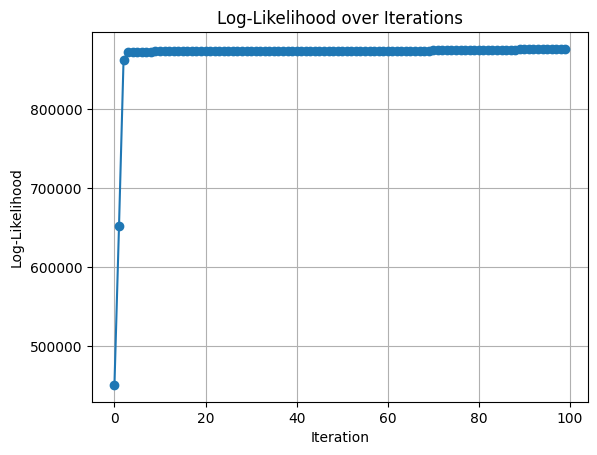

In [184]:
plt.plot(log_likelihoods, marker='o')
plt.title("Log-Likelihood over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid()
plt.show()

In [185]:
print(f"Shape of Means are {means.shape}", sep=" ")
print(f"Shape of Covariances are {covariances.shape}")
print(f"weights {weights}")
print(f"Responsibilities {responsibilities.shape}")  # (N, K)

Shape of Means are (4, 1)
Shape of Covariances are (4, 1, 1)
weights [0.02351204 0.1002825  0.16435039 0.71185508]
Responsibilities (224000, 4)


In [220]:
def select_infarct_cluster(means, segmented, image, min_frac, max_frac):
    """
    Pick the cluster corresponding to infarct:
      - infarcts on DWI are typically hyperintense (brightest cluster)
      - apply size constraints to avoid background/artifacts
    Inputs:
      - means: (K, 1) array of cluster means
      - segmented: (H, W) array of cluster labels from GMM
      - image: (H, W) original image intensities
      - min_frac, max_frac: allowable fraction of total pixels for infarct cluster
    Returns:
      index of chosen cluster
    """
    H, W = image.shape
    Npix = H * W
    K = means.shape[0]

    cluster_mean_intensity = []
    cluster_sizes = []

    for k in range(K):
        mask = (segmented == k)
        cluster_sizes.append(mask.sum())
        if mask.sum() == 0:
            cluster_mean_intensity.append(-np.inf)
        else:
            cluster_mean_intensity.append(np.mean(image[mask]))
    
    cluster_mean_intensity = np.array(cluster_mean_intensity)
    cluster_sizes = np.array(cluster_sizes)

    order = np.argsort(np.array(cluster_mean_intensity).ravel())[::-1]

    for idx in order:
        frac = cluster_sizes[idx] / Npix
        if min_frac <= frac <= max_frac:
            print(f"Chosen cluster {idx} with size fraction {frac:.4f}")
            return idx

    # fallback: pick the brightest
    print(f"Fallback: Chosen cluster {order[0]} with size fraction {cluster_sizes[order[0]] / Npix:.4f}")
    return order[0]


In [238]:
from scipy.ndimage import binary_fill_holes
def postprocess_mask(binary_mask, min_area=7, closing_radius=1.5):
    """
    Morphological cleanup:
     - remove small objects
     - closing to fill holes
     - filter connected components by area
    Inputs:
      - binary_mask: (H, W) boolean or 0/1 mask
      - min_area: minimum allowed lesion size (pixels)
      - closing_radius: radius for morphological closing
      - max_area: maximum allowed lesion size (pixels)
    Returns:
      final cleaned binary mask (uint8: 0/1)
    """
    # remove very small specks
    binary_mask = (binary_mask > 0).astype(np.uint8)
    cleaned = morphology.remove_small_objects(binary_mask.astype(bool), min_size=min_area)
    
    selem = morphology.disk(closing_radius)
    cleaned = morphology.opening(cleaned, selem) # remove noise before closing

    cleaned = binary_fill_holes(cleaned)    # fill holes
    closed = morphology.closing(cleaned, selem)

    return closed.astype(np.uint8)


In [239]:
def assign_gmm_labels(image, means, covariances, weights, reg_covar=1e-6):
    """
    Assign GMM cluster labels to each pixel in the image using precomputed GMM parameters.
    image: 2D numpy array (H, W)
    means: (K, d)
    covariances: (K, d, d)
    weights: (K,)
    Returns: labels (H, W)
    """
    img_n = normalize_intensity(image, method='minmax')
    X_local = img_n.reshape(-1, 1)  # shape (N, 1)
    N = X_local.shape[0]
    K = means.shape[0]
    responsibilities = np.zeros((N, K))
    for n in range(N):
        for k in range(K):
            responsibilities[n, k] = weights[k] * gaussian_pdf(X_local[n], means[k], covariances[k], reg_covar)
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    labels = np.argmax(responsibilities, axis=1)
    return img_n,labels.reshape(image.shape)

Chosen cluster 0 with size fraction 0.0081
Chosen cluster 0 with size fraction 0.0869
Chosen cluster 0 with size fraction 0.1362
Chosen cluster 0 with size fraction 0.0528
Chosen cluster 0 with size fraction 0.0105
Chosen cluster 0 with size fraction 0.0057
Chosen cluster 0 with size fraction 0.0189
Chosen cluster 0 with size fraction 0.0185
Chosen cluster 0 with size fraction 0.0128
Chosen cluster 0 with size fraction 0.0512
Chosen cluster 0 with size fraction 0.0490
Chosen cluster 0 with size fraction 0.0717
Chosen cluster 0 with size fraction 0.0321
Chosen cluster 0 with size fraction 0.0081
Chosen cluster 0 with size fraction 0.0099


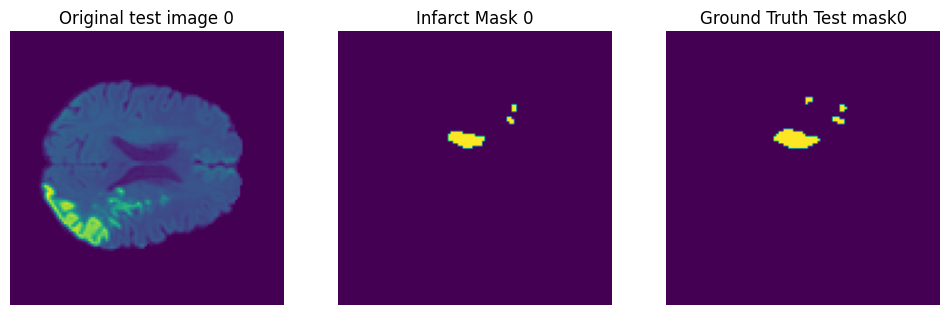

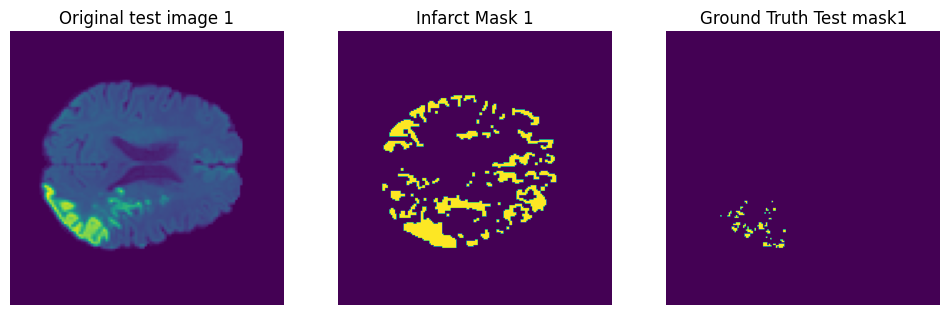

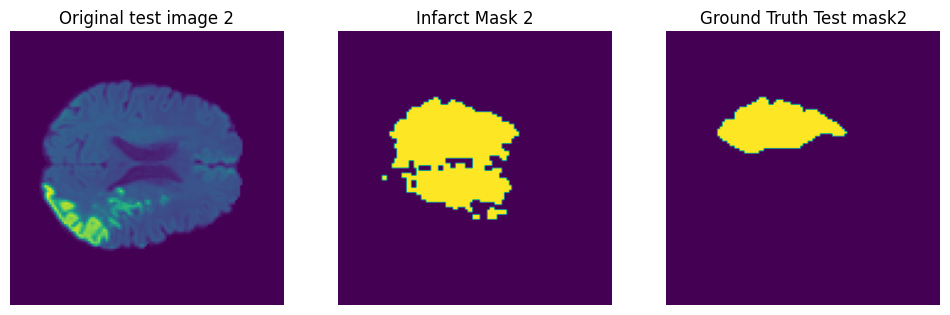

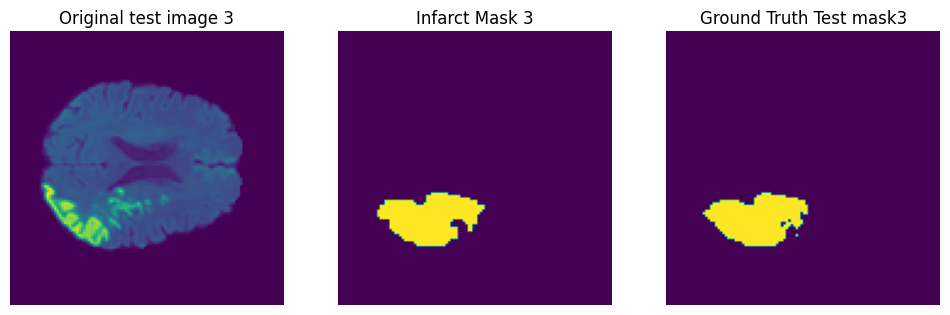

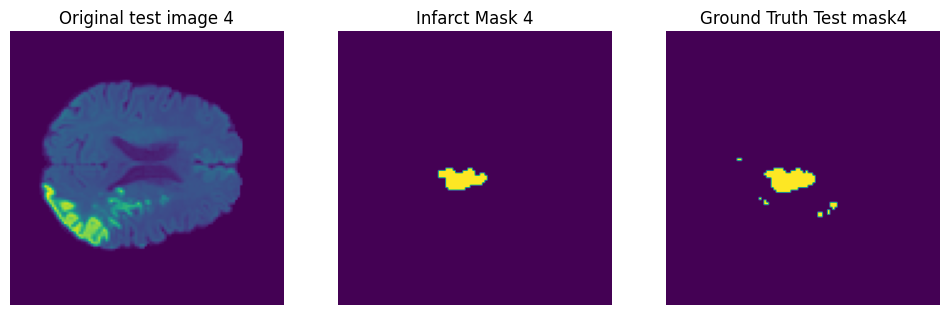

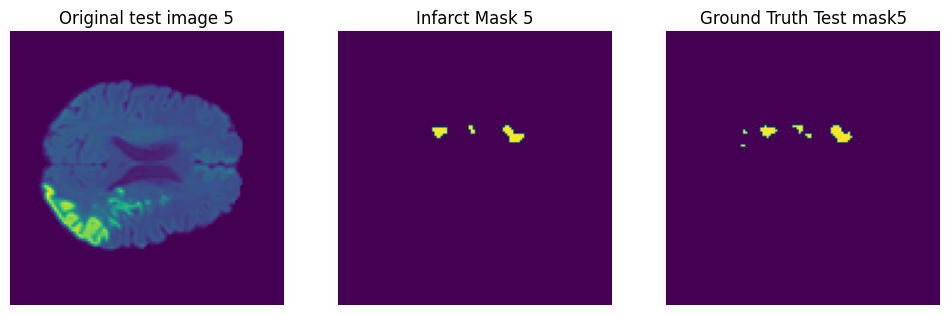

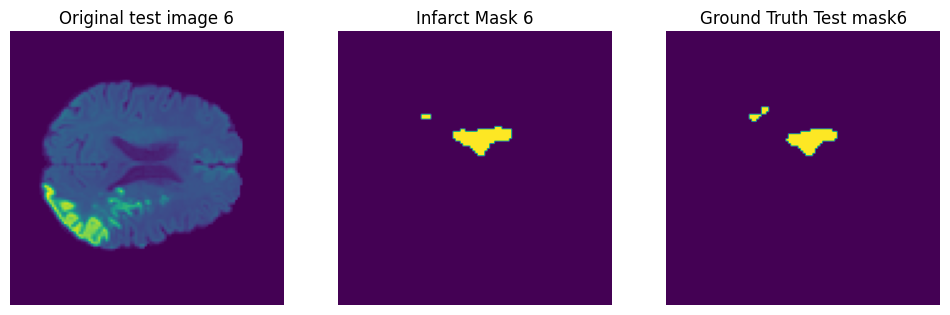

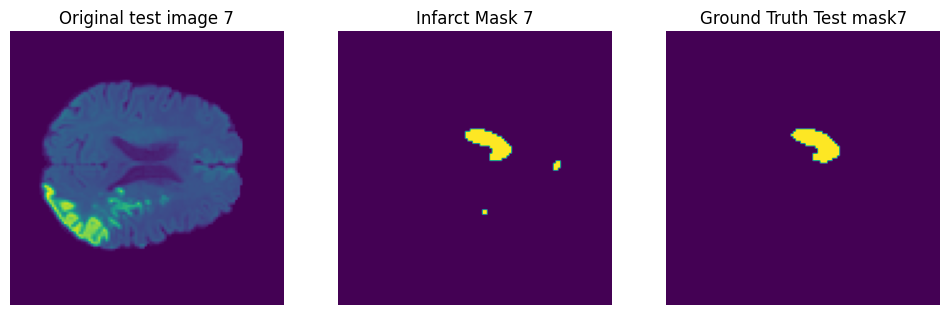

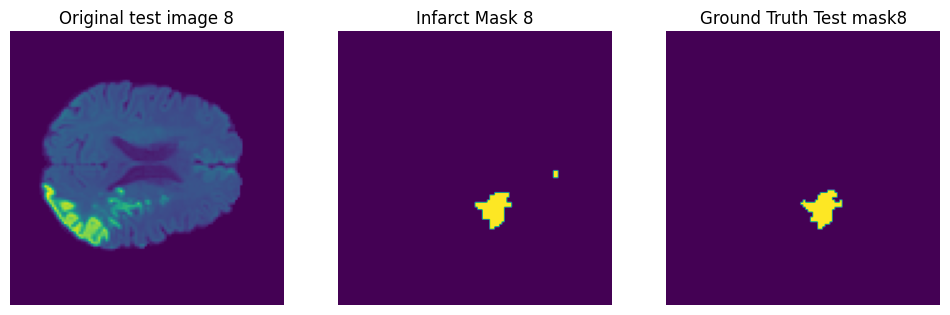

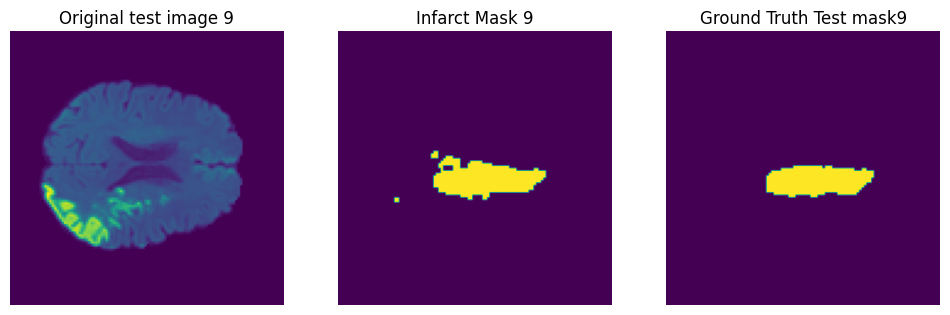

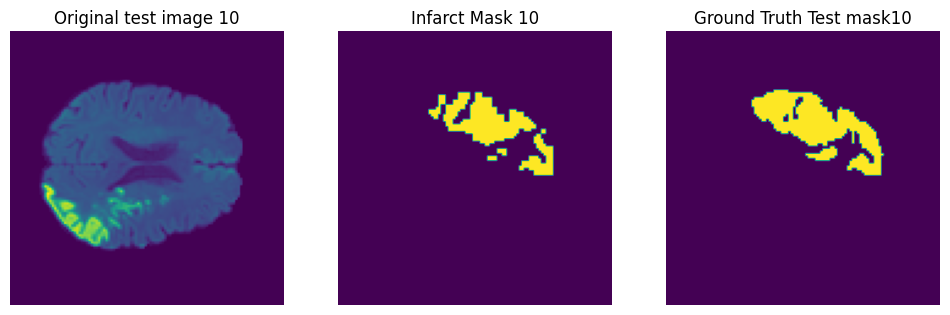

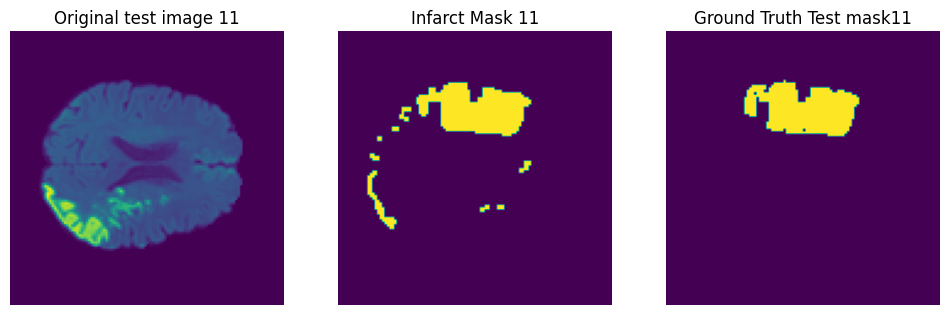

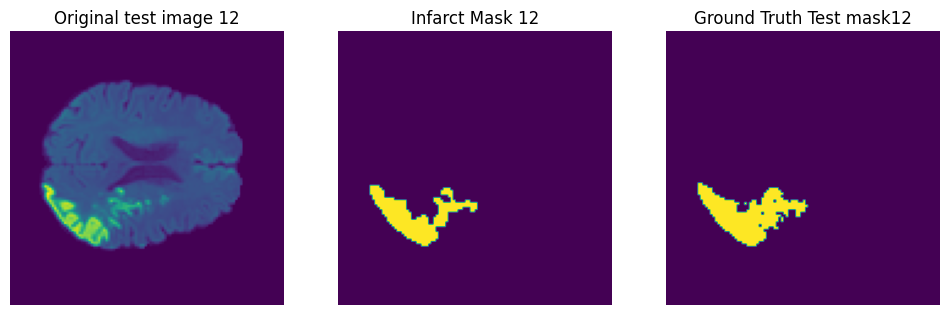

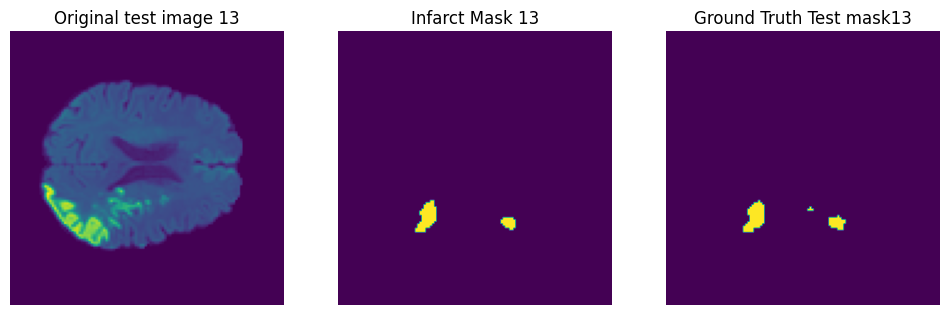

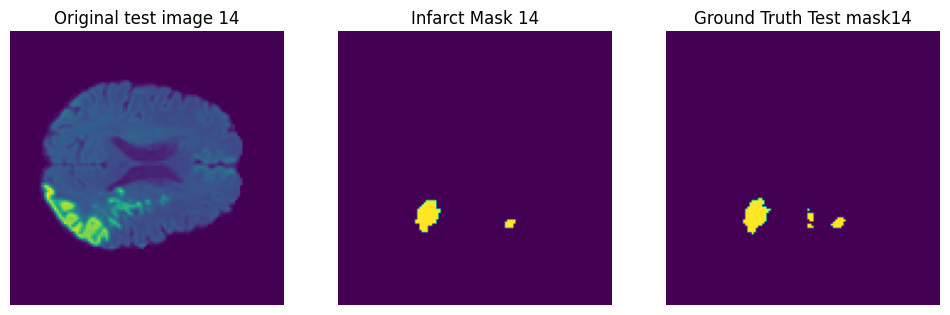

In [249]:
for i in range(len(sample_images)):
    # img = test_images[i]
    # normalized_img = normalize_intensity(img)
    # X = normalized_img.reshape(-1, 1)
    # # means, covariances, weights, responsibilities, _ = GaussianMixtureModel(X, K=4, max_iter=200, tol=1e-4)
    # labels = np.argmax(responsibilities, axis=1)
    normalized_img, segmented = assign_gmm_labels(sample_images[i], means, covariances, weights)
    # segmented = labels.reshape(img.shape)
    infarct_idx = select_infarct_cluster(means, segmented, normalized_img, min_frac=0.005, max_frac=0.15)

    # Build binary mask
    binary_mask = (segmented == infarct_idx)

    # Clean it up
    final_mask = postprocess_mask(binary_mask)

    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Original test image {i}")
    plt.subplot(1,3,2)
    plt.imshow(final_mask)
    plt.axis("off")
    plt.title("Infarct Mask " +str(i))
    plt.subplot(1,3,3)
    plt.imshow(sample_masks[i])
    plt.title("Ground Truth Test mask" +str(i))
    plt.axis("off")
plt.show()


In [206]:
def dice_coefficient(gt, pred, eps=1e-8):
    gt = gt.astype(bool)
    pred = pred.astype(bool)
    inter = np.logical_and(gt, pred).sum()
    return 2.0 * inter / (gt.sum() + pred.sum() + eps)

In [242]:
def lesion_wise_f1_and_counts(gt, pred, iou_threshold=0.08):
    """
    Lesion-wise F1:
      - find connected components in GT and pred
      - declare a GT lesion matched if any predicted lesion has IoU > threshold
      - declare a predicted lesion matched if it matches a GT
      - compute precision, recall -> F1
    Returns: f1, GT_count, pred_count
    """
    gt_labels = measure.label(gt.astype(bool))
    pred_labels = measure.label(pred.astype(bool))
    gt_props = measure.regionprops(gt_labels)
    pred_props = measure.regionprops(pred_labels)

    GT_n = len(gt_props)
    P_n = len(pred_props)
    matched_gt = 0
    matched_pred = 0

    # build bounding boxes and pixel sets for efficiency
    pred_masks = []
    for p in pred_props:
        pred_masks.append((p.label, pred_labels == p.label))

    for g in gt_props:
        gmask = (gt_labels == g.label)
        matched = False
        for plabel, pmask in pred_masks:
            inter = np.logical_and(gmask, pmask).sum()
            union = np.logical_or(gmask, pmask).sum()
            iou = inter / union if union > 0 else 0.0
            if iou >= iou_threshold:
                matched = True
                break
        if matched:
            matched_gt += 1

    # predicted matched count
    gt_masks = []
    for g in gt_props:
        gt_masks.append((g.label, gt_labels == g.label))
    for p in pred_props:
        pmask = (pred_labels == p.label)
        matched = False
        for glabel, gmask in gt_masks:
            inter = np.logical_and(gmask, pmask).sum()
            union = np.logical_or(gmask, pmask).sum()
            iou = inter / union if union > 0 else 0.0
            if iou >= iou_threshold:
                matched = True
                break
        if matched:
            matched_pred += 1

    precision = matched_pred / (P_n + 1e-8)
    recall = matched_gt / (GT_n + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8) if (precision+recall)>0 else 0.0
    return f1, GT_n, P_n

In [243]:
def segment_slice_with_gmm(slice_img, K, min_frac, max_frac, verbose=False):
    """
    Input:
      slice_img: 2D numpy array (H,W) intensity
    Returns:
      final_mask (binary HxW), cluster_masks(list of HxW), means, covariances, responsibilities
    """
    H, W = slice_img.shape
    img_n = normalize_intensity(slice_img, method='minmax')
    # Unpack the output of assign_gmm_labels
    _, labels = assign_gmm_labels(slice_img, means, covariances, weights)
    labels = np.asarray(labels).reshape(H, W)  # Ensure shape and type

    cluster_masks = []
    for k in range(K):
        mask = (labels == k).astype(np.uint8)  # Use np.uint8
        cluster_masks.append(mask)

    # select infarct cluster using rule
    chosen_idx = select_infarct_cluster(means, labels, img_n, min_frac=min_frac, max_frac=max_frac)
    chosen_mask = cluster_masks[chosen_idx].astype(np.uint8)

    # Postprocess
    final_mask = postprocess_mask(chosen_mask)

    return final_mask

In [245]:
# DICE and lesion-wise F1 evaluation on sample images
dice_scores = []
f1_scores = []
for i in range(len(sample_images)):
    img = sample_images[i]
    gt_mask = sample_masks[i]
    pred_mask = segment_slice_with_gmm(img, K,min_frac=0.0005, max_frac=0.2)
    dice = dice_coefficient(gt_mask, pred_mask)
    f1, GT_n, P_n = lesion_wise_f1_and_counts(gt_mask, pred_mask)
    dice_scores.append(dice)
    f1_scores.append(f1)
    print(f"Sample Image {i+1}: Dice={dice:.4f}, Lesion-wise F1={f1:.4f}, GT lesions={GT_n}, Pred lesions={P_n}")
print(f"Average Dice on Sample Images: {np.mean(dice_scores):.4f}")
print(f"Average Lesion-wise F1 on Sample Images: {np.mean(f1_scores):.4f}")


Chosen cluster 0 with size fraction 0.0081
Sample Image 1: Dice=0.8134, Lesion-wise F1=0.8571, GT lesions=4, Pred lesions=3
Chosen cluster 0 with size fraction 0.0869
Sample Image 2: Dice=0.1092, Lesion-wise F1=0.0315, GT lesions=25, Pred lesions=51
Chosen cluster 0 with size fraction 0.1362
Sample Image 3: Dice=0.6008, Lesion-wise F1=0.4000, GT lesions=1, Pred lesions=4
Chosen cluster 0 with size fraction 0.0528
Sample Image 4: Dice=0.9567, Lesion-wise F1=0.6667, GT lesions=2, Pred lesions=1
Chosen cluster 0 with size fraction 0.0105
Sample Image 5: Dice=0.8440, Lesion-wise F1=0.2500, GT lesions=7, Pred lesions=1
Chosen cluster 0 with size fraction 0.0057
Sample Image 6: Dice=0.8471, Lesion-wise F1=0.6667, GT lesions=6, Pred lesions=3
Chosen cluster 0 with size fraction 0.0189
Sample Image 7: Dice=0.8679, Lesion-wise F1=1.0000, GT lesions=2, Pred lesions=2
Chosen cluster 0 with size fraction 0.0185
Sample Image 8: Dice=0.8822, Lesion-wise F1=0.5000, GT lesions=1, Pred lesions=3
Chosen

In [246]:
TestResults = []
# DICE and lesion-wise F1 evaluation on test images, and lesion wise absolute element difference
dice_scores = []
f1_scores = []
abs_diffs = []

# make sure TestResults directory exists
os.makedirs("TestResults", exist_ok=True)

for i in range(len(test_images)):
    img = test_images[i]
    gt_mask = test_masks[i]
    start_time = time.time()
    pred_mask = segment_slice_with_gmm(img,K,min_frac=0.0005,max_frac=0.15)


    dice = dice_coefficient(gt_mask, pred_mask)
    f1, GT_n, P_n = lesion_wise_f1_and_counts(gt_mask, pred_mask)
    abs_diff = abs(GT_n - P_n)

    dice_scores.append(dice)
    f1_scores.append(f1)
    abs_diffs.append(abs_diff)

    # Save result
    TestResults.append(pred_mask)
    pred_nifti = nib.Nifti1Image(pred_mask.astype(np.uint8), affine=np.eye(4))
    # nib.save(pred_nifti, os.path.join("TestResults", f"Test{i+1}-mask.nii.gz"))

    print(f"Test Image {i+1}: Dice={dice:.4f}, Lesion-wise F1={f1:.4f}, "
          f"GT lesions={GT_n}, Pred lesions={P_n}, |GT-Pred|={abs_diff}")

print(f"Average Dice on Test Images: {np.mean(dice_scores):.4f}")
print(f"Average Lesion-wise F1 on Test Images: {np.mean(f1_scores):.4f}")
print(f"Average |GT-Pred| on Test Images: {np.mean(abs_diffs):.4f}")


Chosen cluster 0 with size fraction 0.0427
Test Image 1: Dice=0.9103, Lesion-wise F1=0.5000, GT lesions=2, Pred lesions=6, |GT-Pred|=4
Chosen cluster 0 with size fraction 0.0111
Test Image 2: Dice=0.8718, Lesion-wise F1=0.8000, GT lesions=3, Pred lesions=2, |GT-Pred|=1
Chosen cluster 0 with size fraction 0.0159
Test Image 3: Dice=0.9377, Lesion-wise F1=0.6667, GT lesions=2, Pred lesions=1, |GT-Pred|=1
Chosen cluster 0 with size fraction 0.0145
Test Image 4: Dice=0.9211, Lesion-wise F1=0.6667, GT lesions=1, Pred lesions=2, |GT-Pred|=1
Chosen cluster 0 with size fraction 0.0033
Test Image 5: Dice=0.6471, Lesion-wise F1=0.6667, GT lesions=3, Pred lesions=3, |GT-Pred|=0
Chosen cluster 0 with size fraction 0.0035
Test Image 6: Dice=0.7037, Lesion-wise F1=0.8000, GT lesions=3, Pred lesions=2, |GT-Pred|=1
Chosen cluster 0 with size fraction 0.0105
Test Image 7: Dice=0.8200, Lesion-wise F1=1.0000, GT lesions=1, Pred lesions=1, |GT-Pred|=0
Chosen cluster 0 with size fraction 0.0486
Test Image 8

Chosen cluster 0 with size fraction 0.0427
Chosen cluster 0 with size fraction 0.0111
Chosen cluster 0 with size fraction 0.0159
Chosen cluster 0 with size fraction 0.0145
Chosen cluster 0 with size fraction 0.0033
Chosen cluster 0 with size fraction 0.0035
Chosen cluster 0 with size fraction 0.0105
Chosen cluster 0 with size fraction 0.0486
Chosen cluster 0 with size fraction 0.0139
Chosen cluster 0 with size fraction 0.0200
Chosen cluster 0 with size fraction 0.0564
Chosen cluster 0 with size fraction 0.0105
Chosen cluster 0 with size fraction 0.0973
Chosen cluster 0 with size fraction 0.0052
Chosen cluster 0 with size fraction 0.0287


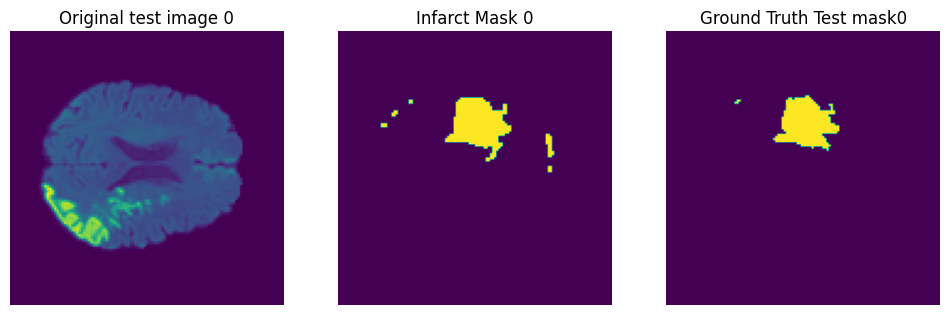

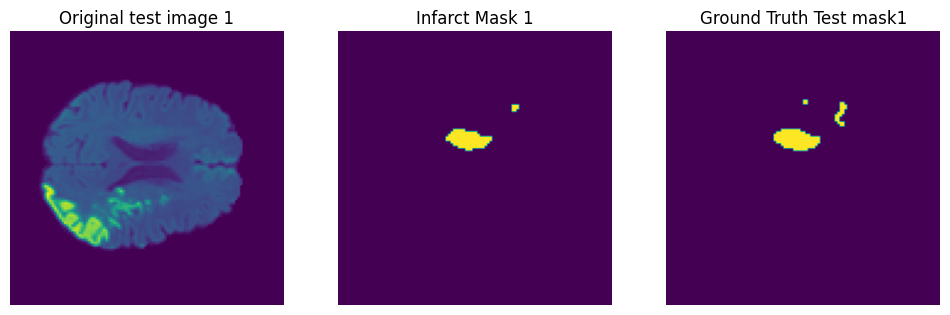

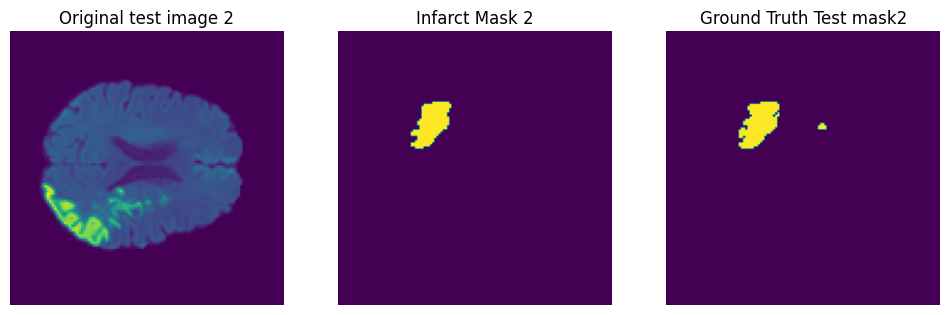

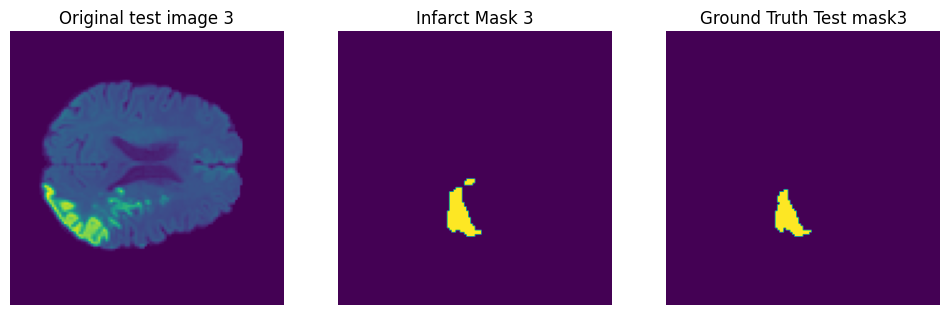

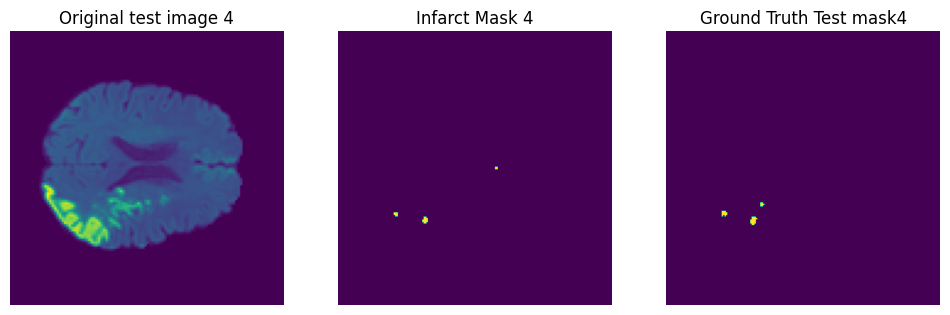

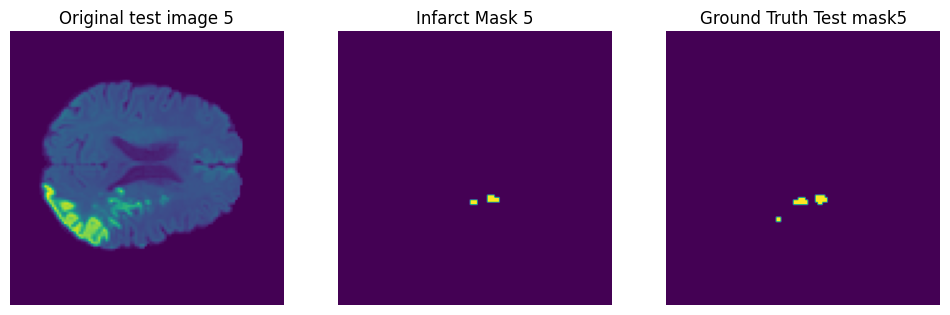

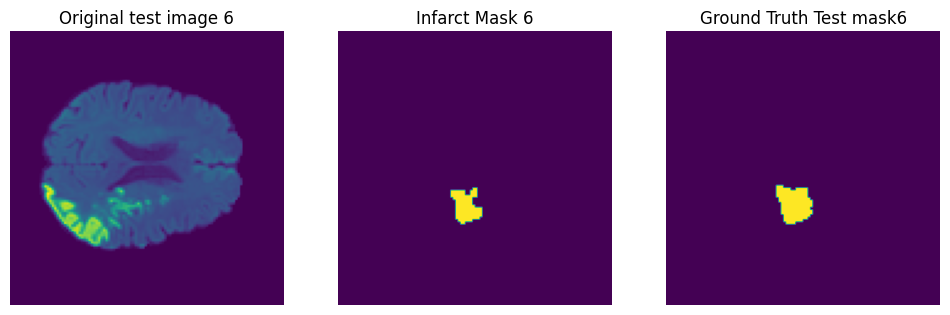

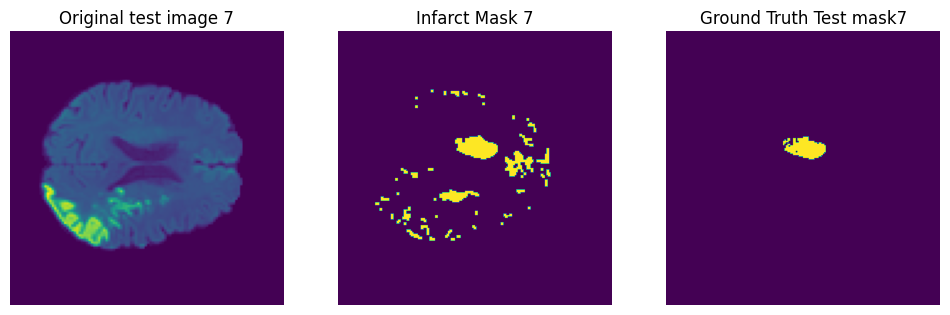

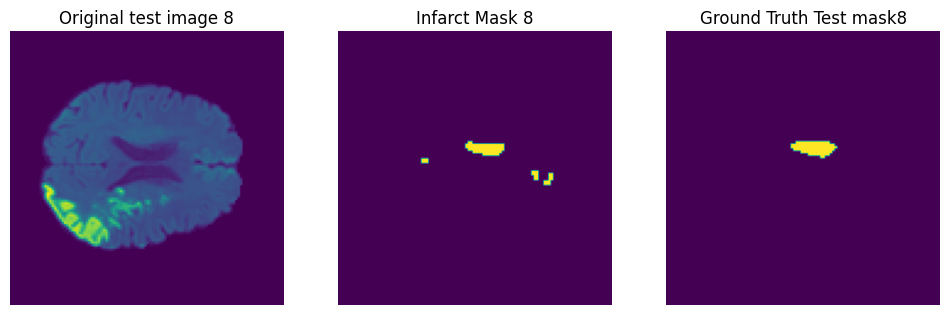

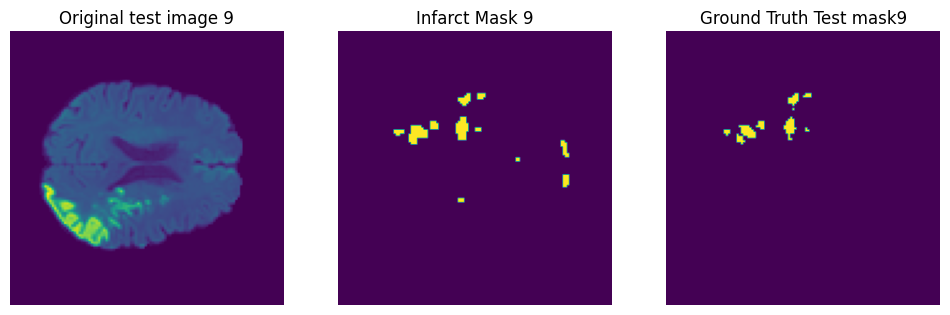

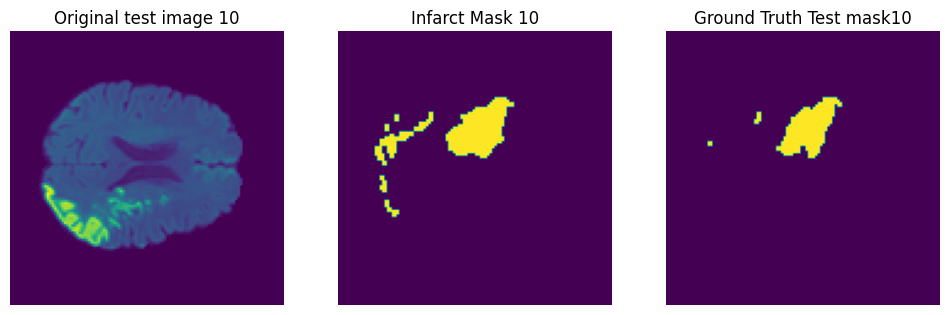

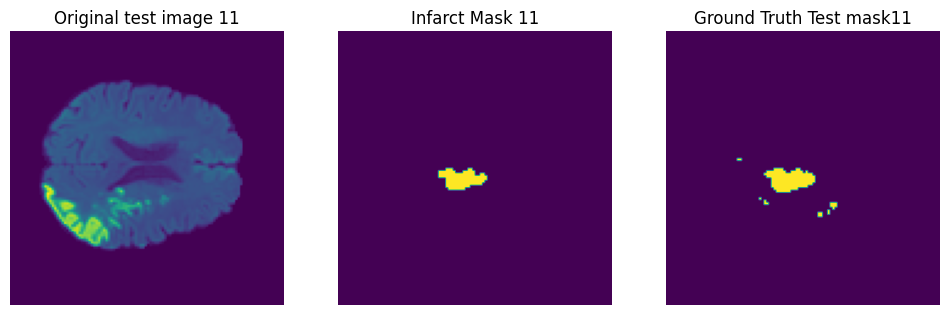

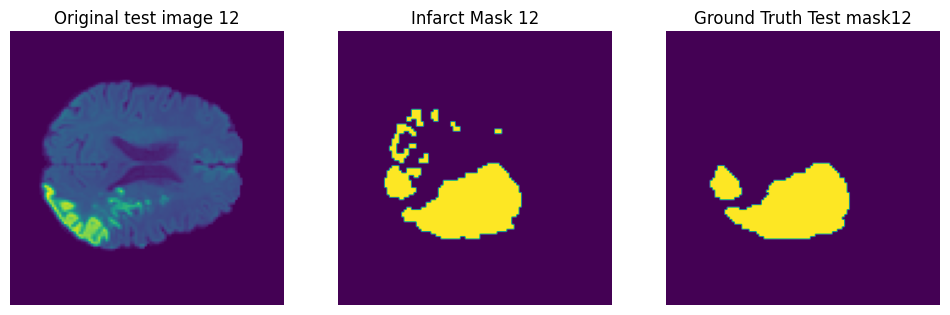

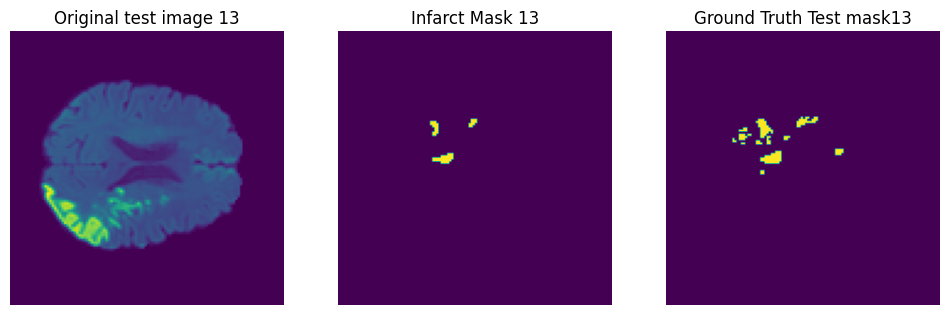

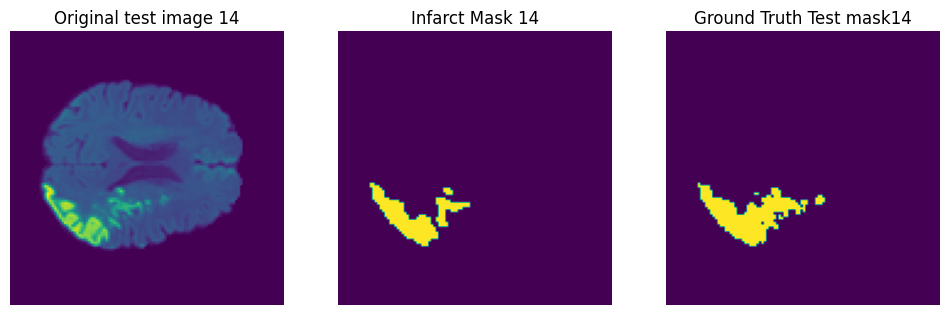

In [247]:
for i in range(len(test_images)):
    # img = test_images[i]
    # normalized_img = normalize_intensity(img)
    # X = normalized_img.reshape(-1, 1)
    # # means, covariances, weights, responsibilities, _ = GaussianMixtureModel(X, K=4, max_iter=200, tol=1e-4)
    # labels = np.argmax(responsibilities, axis=1)
    normalized_img, segmented = assign_gmm_labels(test_images[i], means, covariances, weights)
    # segmented = labels.reshape(img.shape)
    infarct_idx = select_infarct_cluster(means, segmented, normalized_img, min_frac=0.0005, max_frac=0.1)

    # Build binary mask
    binary_mask = (segmented == infarct_idx)

    # Clean it up
    final_mask = postprocess_mask(binary_mask)

    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Original test image {i}")
    plt.subplot(1,3,2)
    plt.imshow(final_mask)
    plt.axis("off")
    plt.title("Infarct Mask " +str(i))
    plt.subplot(1,3,3)
    plt.imshow(test_masks[i])
    plt.title("Ground Truth Test mask" +str(i))
    plt.axis("off")
plt.show()
